In [ ]:

!pip install -q --upgrade --force-reinstall --no-deps --no-cache-dir scikit-learn joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 150.7 MB/s eta 0:00:00


In [ ]:

import os
os.kill(os.getpid(), 9)


In [ ]:
# Colab python cell
import sys, numpy as np
print("python:", sys.version.splitlines()[0])
print("numpy:", np.__version__)
try:
    import sklearn
    print("scikit-learn:", sklearn.__version__)
except Exception as e:
    print("scikit-learn import failed:", repr(e))


python: 3.12.12 (main, Oct 10 2025, 08:52:57) [GCC 11.4.0]
numpy: 2.0.2
scikit-learn: 1.8.0


In [ ]:
# Colab cell
!pip install -q nltk joblib

import pandas as pd
import numpy as np
import re
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import nltk
nltk.download('stopwords', quiet=True)
from nltk.corpus import stopwords
STOP = set(stopwords.words('english'))
print("ready — numpy", np.__version__, "sklearn", __import__("sklearn").__version__)


ready — numpy 2.0.2 sklearn 1.8.0


In [ ]:
# Colab cell
df = pd.read_csv('spam.csv', encoding='latin-1')[['v1','v2']]
df.columns = ['label','msg']
df['label'] = df['label'].map({'ham':0,'spam':1})
print("shape:", df.shape)
print(df.label.value_counts(normalize=True))
df.head(4)


shape: (5572, 2)
label
0    0.865937
1    0.134063
Name: proportion, dtype: float64


,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...


In [ ]:
# Colab cell
def clean(s):
    s = str(s).lower()
    s = re.sub(r'http\S+|www\S+',' ', s)
    s = re.sub(r'[^a-z0-9\s]',' ', s)
    s = re.sub(r'\s+',' ', s).strip()
    toks = [w for w in s.split() if w not in STOP]
    return ' '.join(toks)

df['text'] = df.msg.apply(clean)
df[['msg','text']].sample(6, random_state=42)


,msg,text
3245,"Funny fact Nobody teaches volcanoes 2 erupt, t...",funny fact nobody teaches volcanoes 2 erupt ts...
944,I sent my scores to sophas and i had to do sec...,sent scores sophas secondary application schoo...
1044,We know someone who you know that fancies you....,know someone know fancies call 09058097218 fin...
2484,Only if you promise your getting out as SOON a...,promise getting soon text morning let know mad...
812,Congratulations ur awarded either å£500 of CD ...,congratulations ur awarded either 500 cd gift ...
2973,"I'll text carlos and let you know, hang on",text carlos let know hang


In [ ]:
# Colab cell
tf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tf.fit_transform(df.text)
y = df.label.values
print("X shape:", X.shape)


X shape: (5572, 5000)


In [ ]:
# Colab cell
Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("train:", Xtr.shape, "test:", Xte.shape)


train: (4457, 5000) test: (1115, 5000)


In [ ]:
# Colab cell
nb = MultinomialNB()
lr = LogisticRegression(max_iter=2000, class_weight='balanced')
svm = LinearSVC(class_weight='balanced', max_iter=10000)

nb.fit(Xtr, ytr)
lr.fit(Xtr, ytr)
svm.fit(Xtr, ytr)
print("models trained")


models trained


In [ ]:
# Colab cell
models = {'NaiveBayes': nb, 'LogisticRegression': lr, 'LinearSVC': svm}
for name, m in models.items():
    p = m.predict(Xte)
    print(f"--- {name} ---")
    print("Acc:", round(accuracy_score(yte, p),4))
    print(classification_report(yte, p, digits=4))


--- NaiveBayes ---
Acc: 0.9731
              precision    recall  f1-score   support

           0     0.9708    0.9990    0.9847       966
           1     0.9917    0.8054    0.8889       149

    accuracy                         0.9731      1115
   macro avg     0.9813    0.9022    0.9368      1115
weighted avg     0.9736    0.9731    0.9719      1115

--- LogisticRegression ---
Acc: 0.9776
              precision    recall  f1-score   support

           0     0.9876    0.9865    0.9871       966
           1     0.9133    0.9195    0.9164       149

    accuracy                         0.9776      1115
   macro avg     0.9504    0.9530    0.9517      1115
weighted avg     0.9776    0.9776    0.9776      1115

--- LinearSVC ---
Acc: 0.9874
              precision    recall  f1-score   support

           0     0.9897    0.9959    0.9928       966
           1     0.9720    0.9329    0.9521       149

    accuracy                         0.9874      1115
   macro avg     0.9809    0

In [ ]:
# Colab cell
joblib.dump(tf, 'tfidf_vec.pkl')
joblib.dump(lr, 'sms_spam_lr.pkl')   # change filename if you prefer nb or svm
print("Saved tfidf_vec.pkl and sms_spam_lr.pkl")


Saved tfidf_vec.pkl and sms_spam_lr.pkl


In [ ]:
# Colab cell
# If you restart runtime, reload with:
# tf = joblib.load('tfidf_vec.pkl'); lr = joblib.load('sms_spam_lr.pkl')

def predict_sms(s, model=lr, vec=tf):
    t = clean(s)
    v = vec.transform([t])
    lab = model.predict(v)[0]
    prob = None
    if hasattr(model, 'predict_proba'):
        prob = model.predict_proba(v)[0].max()
    return ('SPAM' if lab==1 else 'HAM', float(prob) if prob is not None else None)

print(predict_sms("Free entry in 2 a wkly comp to win a prize"))
print(predict_sms("Hey — are we still meeting tomorrow?"))


('SPAM', 0.8883282730602108)
('HAM', 0.9543404028197622)


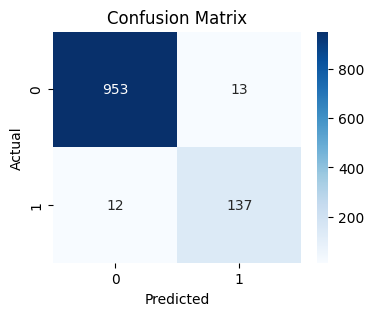

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

m = lr   # choose nb, lr, or svm
p = m.predict(Xte)
cm = confusion_matrix(yte, p)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
%%writefile app.py
import streamlit as st
import joblib
import re
from nltk.corpus import stopwords
STOP = set(stopwords.words('english'))

def clean(s):
    s = str(s).lower()
    s = re.sub(r'[^a-z0-9\s]',' ', s)
    s = re.sub(r'\s+',' ', s).strip()
    toks = [w for w in s.split() if w not in STOP]
    return ' '.join(toks)

tf = joblib.load("tfidf_vec.pkl")
model = joblib.load("sms_spam_lr.pkl")

st.title("SMS Spam Detector")

msg = st.text_input("Enter SMS message:")

if msg:
    t = clean(msg)
    v = tf.transform([t])
    p = model.predict(v)[0]
    st.subheader("Prediction: SPAM" if p==1 else "Prediction: HAM")


Writing app.py


Environment OK
NumPy: 2.0.2
Scikit-learn: 1.6.1

Dataset shape: (5572, 2)
label
0    4825
1     747
Name: count, dtype: int64

MODEL PERFORMANCE

--- Naive Bayes ---
Accuracy: 0.9731
              precision    recall  f1-score   support

           0     0.9708    0.9990    0.9847       966
           1     0.9917    0.8054    0.8889       149

    accuracy                         0.9731      1115
   macro avg     0.9813    0.9022    0.9368      1115
weighted avg     0.9736    0.9731    0.9719      1115

--- Logistic Regression ---
Accuracy: 0.9776
              precision    recall  f1-score   support

           0     0.9876    0.9865    0.9871       966
           1     0.9133    0.9195    0.9164       149

    accuracy                         0.9776      1115
   macro avg     0.9504    0.9530    0.9517      1115
weighted avg     0.9776    0.9776    0.9776      1115

--- SVM ---
Accuracy: 0.9874
              precision    recall  f1-score   support

           0     0.9897    0.9959 

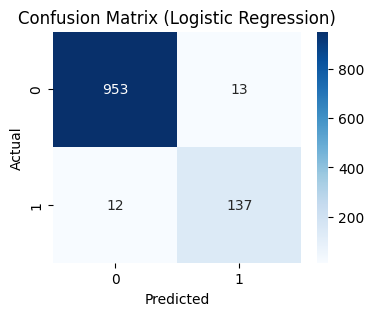


Saved files:
- tfidf_vec.pkl
- sms_spam_model.pkl

SAMPLE PREDICTIONS
Free entry in 2 a wkly comp to win cash prize => SPAM
Hey are we meeting today? => HAM
URGENT! You won a lottery. Call now => SPAM


In [ ]:
# =========================
# SMS SPAM DETECTION — FULL COLAB CODE (SINGLE CELL)
# =========================

# Install minimal deps (do NOT install scikit-learn)
!pip install -q nltk joblib

import pandas as pd
import numpy as np
import re
import joblib
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# -------------------------
# Setup
# -------------------------
nltk.download("stopwords", quiet=True)
from nltk.corpus import stopwords
STOP = set(stopwords.words("english"))

print("Environment OK")
print("NumPy:", np.__version__)
import sklearn
print("Scikit-learn:", sklearn.__version__)

# -------------------------
# Load dataset (uploaded manually)
# -------------------------
df = pd.read_csv("spam.csv", encoding="latin-1")[["v1","v2"]]
df.columns = ["label","msg"]
df["label"] = df["label"].map({"ham":0,"spam":1})

print("\nDataset shape:", df.shape)
print(df.label.value_counts())

# -------------------------
# Text cleaning
# -------------------------
def clean(s):
    s = str(s).lower()
    s = re.sub(r"http\S+|www\S+", " ", s)
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    s = re.sub(r"\s+", " ", s).strip()
    return " ".join(w for w in s.split() if w not in STOP)

df["text"] = df.msg.apply(clean)

# -------------------------
# TF-IDF
# -------------------------
tf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
X = tf.fit_transform(df.text)
y = df.label.values

# -------------------------
# Train / Test split
# -------------------------
Xtr, Xte, ytr, yte = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -------------------------
# Train models
# -------------------------
nb  = MultinomialNB()
lr  = LogisticRegression(max_iter=2000, class_weight="balanced")
svm = LinearSVC(class_weight="balanced", max_iter=10000)

nb.fit(Xtr, ytr)
lr.fit(Xtr, ytr)
svm.fit(Xtr, ytr)

# -------------------------
# Evaluation
# -------------------------
models = {
    "Naive Bayes": nb,
    "Logistic Regression": lr,
    "SVM": svm
}

print("\nMODEL PERFORMANCE\n")
for name, m in models.items():
    p = m.predict(Xte)
    print(f"--- {name} ---")
    print("Accuracy:", round(accuracy_score(yte, p),4))
    print(classification_report(yte, p, digits=4))

# -------------------------
# Confusion Matrix (Logistic Regression)
# -------------------------
p = lr.predict(Xte)
cm = confusion_matrix(yte, p)

plt.figure(figsize=(4,3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression)")
plt.show()

# -------------------------
# Save model + vectorizer
# -------------------------
joblib.dump(tf, "tfidf_vec.pkl")
joblib.dump(lr, "sms_spam_model.pkl")

print("\nSaved files:")
print("- tfidf_vec.pkl")
print("- sms_spam_model.pkl")

# -------------------------
# Prediction function
# -------------------------
def predict_sms(s):
    s = clean(s)
    v = tf.transform([s])
    return "SPAM" if lr.predict(v)[0] == 1 else "HAM"

# -------------------------
# Test predictions
# -------------------------
tests = [
    "Free entry in 2 a wkly comp to win cash prize",
    "Hey are we meeting today?",
    "URGENT! You won a lottery. Call now"
]

print("\nSAMPLE PREDICTIONS")
for t in tests:
    print(t, "=>", predict_sms(t))
